In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.examples.tutorials.mnist import input_data
import pandas as pd
mnist=input_data.read_data_sets('/tmp/data',one_hot=False)


Extracting /tmp/data\train-images-idx3-ubyte.gz
Extracting /tmp/data\train-labels-idx1-ubyte.gz
Extracting /tmp/data\t10k-images-idx3-ubyte.gz
Extracting /tmp/data\t10k-labels-idx1-ubyte.gz


In [105]:
#Visualize decoder setting
#Parameters
learning_rate=0.001
training_epochs=20
batch_size=256
display_step=1
examples_to_show=10

In [82]:
#Network Parameters
n_input=784 #圖片input 28*28


In [83]:
#tf Graph input(只有圖片)
X=tf.placeholder('float',[None,n_input])

In [92]:
#hidden layer settings
n_hidden_1=256 #第一層特徵數
n_hidden_2=64 #第二層特徵數
n_hidden_3=10 
n_hidden_4=2
weights={
    'encoder_h1':tf.Variable(tf.truncated_normal([n_input,n_hidden_1],)),
    'encoder_h2':tf.Variable(tf.truncated_normal([n_hidden_1,n_hidden_2],)),
    'encoder_h3':tf.Variable(tf.truncated_normal([n_hidden_2,n_hidden_3],)),
    'encoder_h4':tf.Variable(tf.truncated_normal([n_hidden_3,n_hidden_4],)),
    
    
    'decoder_h1':tf.Variable(tf.truncated_normal([n_hidden_4,n_hidden_3],)),
    'decoder_h2':tf.Variable(tf.truncated_normal([n_hidden_3,n_hidden_2],)),
    'decoder_h3':tf.Variable(tf.truncated_normal([n_hidden_2,n_hidden_1],)),
    'decoder_h4':tf.Variable(tf.truncated_normal([n_hidden_1,n_input],)),

}

biases={
    'encoder_b1':tf.Variable(tf.random_normal([n_hidden_1])),
    'encoder_b2':tf.Variable(tf.random_normal([n_hidden_2])),
    'encoder_b3':tf.Variable(tf.random_normal([n_hidden_3])),
    'encoder_b4':tf.Variable(tf.random_normal([n_hidden_4])),
    
    'decoder_b1':tf.Variable(tf.random_normal([n_hidden_3])),
    'decoder_b2':tf.Variable(tf.random_normal([n_hidden_2])),
    'decoder_b3':tf.Variable(tf.random_normal([n_hidden_1])),
    'decoder_b4':tf.Variable(tf.random_normal([n_input])),


}

n_hidden_2:如果要顯示在2維上就把它壓成2個元素 <br>
經過4層壓縮 效果比較好


In [98]:
#Building the encoder
def encoder(x):
    
    layer_1=tf.nn.sigmoid(tf.add(tf.matmul(x,weights['encoder_h1']),biases['encoder_b1'] ))
    layer_2=tf.nn.sigmoid(tf.add(tf.matmul(layer_1,weights['encoder_h2']),biases['encoder_b2'] ))
    layer_3=tf.nn.sigmoid(tf.add(tf.matmul(layer_2,weights['encoder_h3']),biases['encoder_b3'] ))
    layer_4=tf.add(tf.matmul(layer_3,weights['encoder_h4']),biases['encoder_b4'] )
    
    
    return layer_4

第一層把input壓縮成256個元素 <br>
第二層把input壓縮成128個元素

In [99]:
#Building the decoder
def decoder(x):
    #Encoder Hidden layer with sigmoid activation #1
    layer_1=tf.nn.sigmoid(tf.add(tf.matmul(x,weights['decoder_h1']),biases['decoder_b1']))
    layer_2=tf.nn.sigmoid(tf.add(tf.matmul(layer_1,weights['decoder_h2']),biases['decoder_b2']))
    layer_3=tf.nn.sigmoid(tf.add(tf.matmul(layer_2,weights['decoder_h3']),biases['decoder_b3']))
    layer_4=tf.nn.sigmoid(tf.add(tf.matmul(layer_3,weights['decoder_h4']),biases['decoder_b4']))
    
    return layer_4

In [100]:
#Construct model
encoder_op=encoder(X)
decoder_op=decoder(encoder_op)

In [101]:
#Prediction
y_pred=decoder_op
#Targets(labels) are the input data
y_true=X

In [102]:
#Define the loss and the optimizer,minimize the square error
cost=tf.reduce_mean(tf.pow(y_true-y_pred,2))
optimizer=tf.train.AdamOptimizer(learning_rate).minimize(cost)

In [103]:
#Initializing the variables
init=tf.initialize_all_variables()

Epoch 0001 cost= 0.081424847
Epoch 0002 cost= 0.066434801
Epoch 0003 cost= 0.059553225
Epoch 0004 cost= 0.052701920
Epoch 0005 cost= 0.054192405
Epoch 0006 cost= 0.050161570
Epoch 0007 cost= 0.047978383
Epoch 0008 cost= 0.047786575
Epoch 0009 cost= 0.043336809
Epoch 0010 cost= 0.043459967
Epoch 0011 cost= 0.042378552
Epoch 0012 cost= 0.043671701
Epoch 0013 cost= 0.042371493
Epoch 0014 cost= 0.043677647
Epoch 0015 cost= 0.040926952
Epoch 0016 cost= 0.040351927
Epoch 0017 cost= 0.041442659
Epoch 0018 cost= 0.040480632
Epoch 0019 cost= 0.041133743
Epoch 0020 cost= 0.040223375
Optimization Finished!


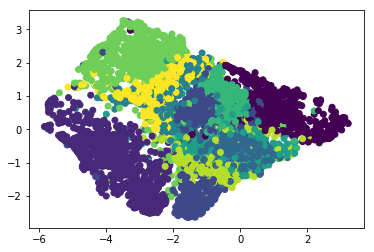

In [119]:
#Launch the graph
with tf.Session() as sess:
    sess.run(init)
    total_batch=int(mnist.train.num_examples/batch_size)
    #Training cycle
    
    for epoch in range(training_epochs):
        #Loop over batches
        for i in range(total_batch):
            batch_xs,batch_ys=mnist.train.next_batch(batch_size) #max(x)=1
            #Run optimization (backprop) and cost op(to get loss value)
            _,c=sess.run([optimizer,cost],feed_dict={X:batch_xs})
        #Display logs per epoch step
        if epoch % display_step==0:
            print('Epoch','%04d'%(epoch+1),'cost=','{:.9f}'.format(c))
    print('Optimization Finished!')
    
    ##Applying encode and doecode over test set
    encode_decode=sess.run(y_pred,feed_dict={X:mnist.test.images[:examples_to_show]})
    
#     #Compare original images with their reconstructions
    
#     f,a=plt.subplots(2,10,figsize=(10,2))
    
#     for i in range(examples_to_show):
#         a[0][i].imshow(np.reshape(mnist.test.images[i],(28,28)))
#         a[1][i].imshow(np.reshape(encode_decode[i],(28,28)))
#     plt.show()
    
    
    encoder_result=sess.run(encoder_op,feed_dict={X:mnist.test.images})
    plt.scatter(encoder_result[:,0],encoder_result[:,1],c=mnist.test.labels)
    plt.show()

In [118]:
pd.DataFrame(encoder_result[:,])

,0,1
0,0.117680,0.005949
1,-1.230259,0.737964
2,1.364553,1.248599
3,-1.552046,-1.560151
4,-0.437716,-0.843234
5,1.366831,1.247548
6,0.303240,-0.439813
7,0.383014,-0.967760
8,-1.229127,-0.402422
9,-0.226116,0.073473


In [125]:

from numpy import dot
from numpy.linalg import norm
a=[0.117680,0.005949]
b=[0.383014,-0.967760]
cos_sim = dot(a, b)/(norm(a)*norm(b))
cos_sim

0.32058631199979776

In [128]:
?norm(a)

In [137]:
pd.DataFrame(mnist.train.images[1].reshape([28,28]))

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.647059,0.039216,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.972549,0.713726,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.364706,0.960784,0.141176,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.101961,0.901961,0.007843,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.149020,0.254902,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0


In [ ]:
c= '001001010'
c7='00101010' -> c='001001010'